# Mid- Term Project


Q1: Introduction to ECG and EEG signal

Ans: ECG signal (Electrocardiography):
              Reporting the electrical activity from heart over a period of time using electrodes placed on human skin. These electrodes observe microscopic electrical changes on the skin that araise from heart muscle's electrophysiological pattern of depolarizing and repolarizing during each heart beat.Electrical waves will travel through limited areas of the heart. Muscular cell in the heart contracts when electrical signal is recieved. These changes can be detected in electrical environment around the cell as micro voltage. Graphing the voltage as function of time monitors the pumping of heart. Normal rhythms produces four entities they are P-waves, QRS complex, T waves, U wave. It is used to detect heart attack, shortness of heart.
     EEG(electroencephalogram) detects the electrical activity in brain using electrodes attached to the scalp. Brain cells communicate through electrical impulses and active all the time. EEG determines the voltage change by ironic current within the neurons of the brain. These signals are generally identifies as delta, theta, gamma based on signal frequency range from 0.1HZ to 100HZ. Main application of EEG is diagnostic test for epliepsy.


Q2: Opens the provided ECG signal (aami3a.dat) and plots it. This single contains one ECG signal
sampled at 720Hz with 12-bit resolution.

Number of Samples : 43081


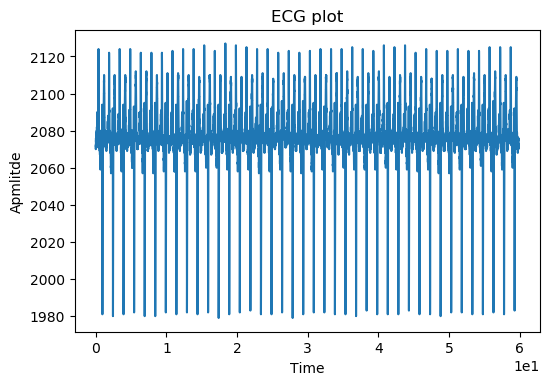

In [1]:
# NOTE: IF YOU ARE EXECUTING FOR THE FIRST TIME RUN
%matplotlib inline

#Importing different packages to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
from pylab import plot
import matplotlib.pyplot as plt
import math
from scipy.signal import butter, lfilter
from scipy.signal import freqs


#Opening the file that contains the ECg signal
f = open('aami3a.dat','rb')

#Reading the data from the file directly into an array 
signal=np.fromfile(f,count=-1,dtype=np.uint16)

#Finding the number of samples acquired
num_samples = len(signal)

#printing the number of samples
print "Number of Samples : %d"%num_samples

#Generating an array x to plot the samples in time domain
x=np.arange(0,num_samples/72e1,1/72e1)  #start,stop,step

#Plotting the samples
plt.plot(x,signal[:num_samples])

#Giving a title and X,Y axes labels to the plot
plt.title('ECG plot')
plt.xlabel('Time')
plt.ylabel('Apmlitde')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

f.close() #close the file

Q3: If a person at rest has an average heart rate between 60 and 100 beats per minute, how many
samples should you plot to obtain 5 beats in the signal?

Ans: Considering that the average heart rate is 60 to 100 beats per minute, the number of samples can be obtained as follows

The sampling frequency is 720 hz. Therefore, about 720 samples can be obtained. This is evident from the above plot of ECG signal

The graph is plotted for 60 seconds (1 min ) and number of samples obtained is 43081. Therfore for a second about 718 (~720) is obtained

If the heart beat is 60 beats/min. Then the heart beat is about 1 beat /second .Therefore for plotting 5 beats , approximately 3600 samples are required

If the heart beat is 100 beats/min. Therefor aproximately 1.667 beats per second. Therfore 5 beats will happen in 3 seconds. Therfore about 2160 samples are required for plotting 5 beats

Average beat reate = (100+60)/2
 
Average beat rate = 80 beats/min

average beat rate = 1.33 beats/second

Therfore 5 beats will happen in little less than 4 seconds. Considering 4 seconds , 2880 samples are required to plot 5 beats


Q4: Plot a zoom-in of the signal where 5 cardiac cycles can be observed considering this person
has a cardiac cycle of 60 beats/minute.

Explanation: Considering that the beat rate of the person is 60 beats/minute. Then 5 beats will get over in 5 seconds.

To plot 5 seconds, 3600 samples are required.

Calibrating the x axis to 5 seconds for 3600 samples require that the sample be marked for every 0.001389 ( 5/3600 = .001389)


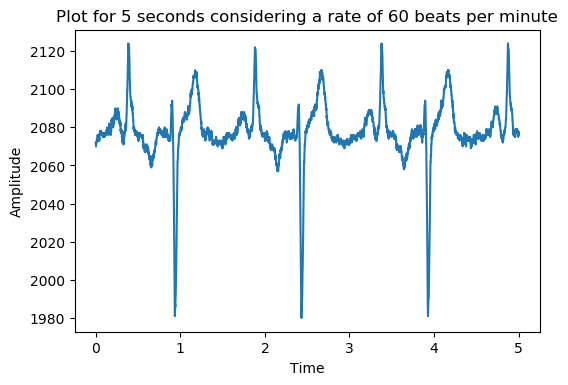

In [2]:
z=np.arange(0,5,0.001389)  #start,stop,step

#plotting the signal for 5 seconds
plt.plot(z,signal[:3600])
plt.title('Plot for 5 seconds considering a rate of 60 beats per minute')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Q4: Considering that an ECG typical signal has the following shape: Was the heart rate lower or higher for this individual?

Ans:The heart rate is lower for the individual. The following is the explanation

The plot was made considering that the heart rate is 60 beats/minute

So,for 5 seconds 5 beats must be observered. However, from the above plot, only about 4 beats are observed.






Q5: Estimate the heart rate of this individual in beats/minute

Ans: 
Doing the math:

For 5 seconds 4 beats, so for a second, 4/5 beats = 0.8 beats in 1 second

For a minute 0.8 x 60 = 48 beats/minute

This is less than the average beat rate of 60 beats per minute




Q6: Obtain the DFT of the signal and plot the full spectrum

temp 21541


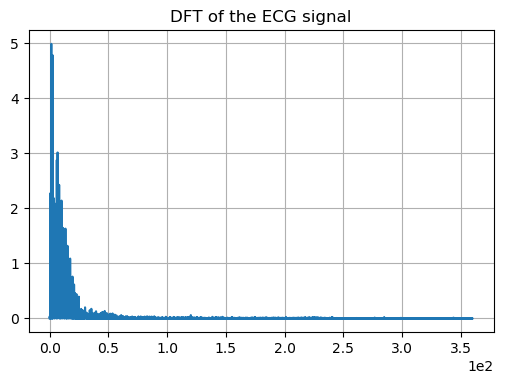

In [3]:
#Removing the dc component from the signal (if any)
ecg_signal=signal-np.mean(signal)

len_ecg_signal=len(signal)

step = 0.0167127

avg_freq = 720/2

temp = math.ceil(avg_freq/step)

print"temp %d"%temp

#end_sample = (int)temp;

#Creating an array for plotting the freqeuncy
f=np.arange(0,avg_freq,step)

#Taking the fast fourirer transform for the signal
Y=np.fft.fft(ecg_signal)

#Taking the average of the values of the signal
mean_val =abs(Y)/len_ecg_signal

plt.plot(f, mean_val[:int(temp)])
plt.title('DFT of the ECG signal')
plt.grid(which='both', axis='both')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Q7: Obtain the frequency at which the maximum is observed
Ans: From the DFT plot it is seen that a maximum is observerd in the first 10 HZ itself. So, first let us plot the DFT for the first 10 HZ alone



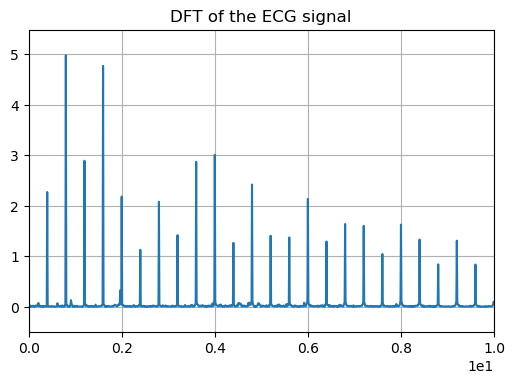

In [4]:
#creating a frequency array to plot 10 HZ
f=np.arange(0,10,0.01)

#Potting the signalfor the first 10 HZ
plt.plot(f, mean_val[:1000])
plt.title('DFT of the ECG signal')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Let us further zoom the plot to the first 1.5 HZ alone

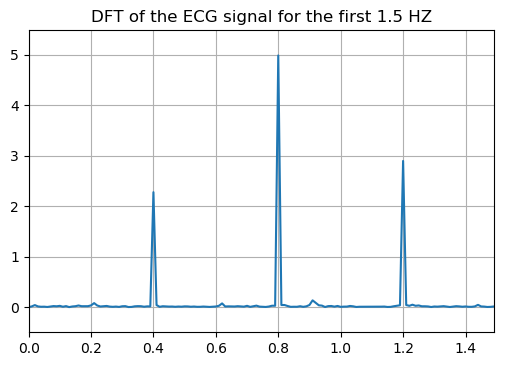

In [5]:
#creating a frequency array to plot 1.5 HZ
f=np.arange(0,1.5,0.01)

#Potting the signalfor the first 1.5 HZ
plt.plot(f, mean_val[:150])
plt.title('DFT of the ECG signal for the first 1.5 HZ')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

From the spectrum, it is clear that a maximum is observed at 0.8 HZ

Q8: From the spectrum, what is your calculation for the heart rate in beats/minute

The maximum is observed at 0.8 HZ, which means 0.8 cycles ( 80% of a beat ) is seen.

In a cycle only 80% of a beat is captured. For a 60 seconds (1 minute) period , 0.8 x 60 = 48 beats will be captured.

This is matching with beat rate that we calculated in Q5


Q9: Discuss in the Markdown the peaks observed in the spectrum and what information they
provide, in particular, explain how can you obtain from the frequency peaks the heart rate

Ans: The peaks obtained in the spectrum are the freqeuncy responses of the depolarisation signal recorded from the 10 electrodes placed in the body

The value peaks at 0.8HZ frequency, meaning that the frquency of the heart beat is 0.8. From this information, the heart beat can be calculated for a minute



Q10: Discuss in the markdown: if you needed to filter this signal (it is quite clean here), would it
be a problem to affect the amplitude of the signal? Use references to justify your answer

Ans: The frequency of heart beat is about 0.8HZ ( 48 beats/minute ) to 1HZ (60 beats/minute).

The requested filter cutoff frequency is 100 HZ. 

From the plot of the DFT of ECG signal ( as plotted for Q6), the amplitude of the signal dies out after about 50 HZ and there is a constant near-zero response after 50 HZ. This means that no noticeable noise is added in the ECG signal

Filtering the signal with a low pass filter of cutoff frequency 100 HZ wont produce any noticeable change in the plot.

Hence a low pass butterworth filter is not necessary

The amplitude of the signal is however reduced for the filtered signal as seen from the plot for Q11 below



Q11: Filter your signal using a digital low-pass Butterworth filter of order 4 that cuts frequencies
above 100Hz
Ans. Let us create a butterworth low pass filter of cut off frequency 100 HZ and filter the ECG signal.

The sampling frequency is 720 hz. So the nyquist frequency is 360 HZ

The normalised cutoff frequecy is cutoff/nyquist = 100/360 = 0.28

Let us use the above calculated values in the program

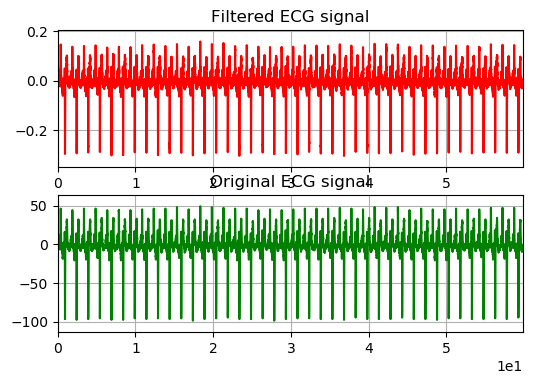

In [6]:
#sampling frequency
fsample = 720

#cut off frequency  of the low pass filter
fcutoff = 100

#nyquist frequency
nyquist = fsample/2

#Normalised frequency value 
fnormalised = float(fcutoff/nyquist)

#Generating a butterworth low pass filter of order 4
b, a = butter(4, 0.28, btype='low', analog = True)

#Filtering the ECG signal with the butterworth filter
ecg_filtered = lfilter(b, a, ecg_signal)


plt.subplot(2,1,1)
plt.plot(x,ecg_filtered,'r')

plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.title('Filtered ECG signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.subplot(2,1,2)
plt.plot(x,ecg_signal,'g')
plt.title('Original ECG signal')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))





Q12: Provide a plot with the frequency response of the filter

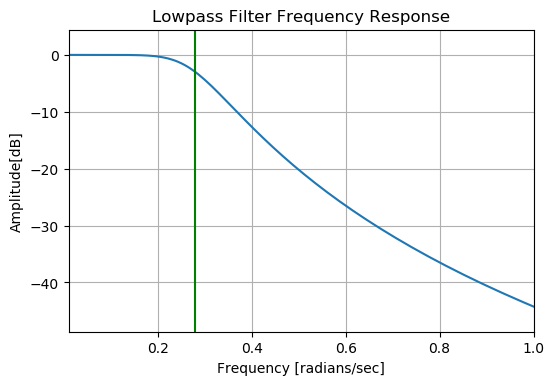

In [9]:
w, h = freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.axvline(0.28, color='g')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [radians/sec]')
plt.ylabel('Amplitude[dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



Q13: Obtain the DFT of the filtered signal and plot the full spectrum after filtering

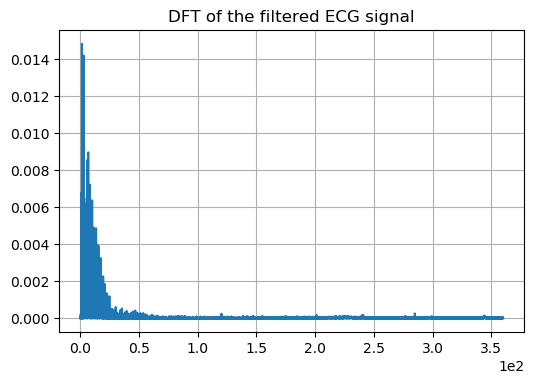

In [10]:
ecg_dft_filtered = np.fft.fft(ecg_filtered)

#Creating an array for plotting the freqeuncy
f=np.arange(0,avg_freq,step)

#Taking the average of the values of the signal
mean_val =abs(ecg_dft_filtered)/len_ecg_signal

plt.plot(f, mean_val[:int(temp)])
plt.title('DFT of the filtered ECG signal')
plt.grid(which='both', axis='both')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


Q14: Discuss in the markdown the efects that your filter may have on any interpretation of the
heart rate, did it affect it? why? why not? Explain.

Ans:  From the plot of the filtered signal, the response is not altered. i.e the shape of the PQRST region is not altered. Hence the heart rate remains the same. Hence it can be said that the filtering did not affect the heart rate.

Let us plot the  same 5 seconds for the filtered signal and find it





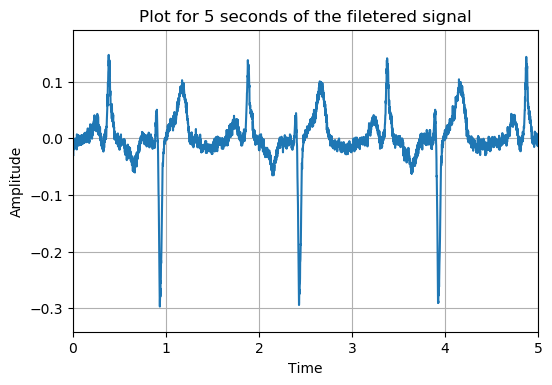

In [11]:
z=np.arange(0,5,0.001389)  #start,stop,step

#plotting the signal for 5 seconds
plt.plot(z,ecg_filtered[:3600])
plt.title('Plot for 5 seconds of the filetered signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


From the above plot, it is clear that the heart beat of the filtered signal has not changed

Q:The efects that your filter may have on any interpretation of the heart rate:

Ans: As already mentioned for Q10, the heart beat frequency is about 0.8 to 1HZ. Also from the DFT plot, the response dies out after 50 HZ, which means that there is no noise after 50 HZ. Filtering the signal with a buttterworth filter of 100 HZ would reproduce the same frequency response in the output as all the heart beat signal would safely pass through the filter.

Hence the heart beat interpretation wont be altered


References:

Salsekar, Bharti, and A. K. Wadhwani. "Filtering of ECG signal using Butterworth filter and its feature extraction." International Journal of Engineering Science & Technology 4 (2012).

